## Functional to minimize

$$I(y, z) = \int\limits_{-A}^{A} \left( F(x,y,y',z,z') \right) dx$$

$$F(x,y,y',z,z') = \frac{D}{2} y y'' + \frac{D}{2} z z'' - \frac{y^2}{2} - \frac{z^2}{2} - k_1y^2z - k_2z^2y - \lambda y - \lambda z$$

## System for functional

$$ 0 = - y - 2k_1 \cdot z \cdot y - k_2 \cdot z^2 + D \cdot \frac{\partial^2 y}{\partial x^2} - \lambda $$
$$ 0 = - z - 2k_2 \cdot z \cdot y - k_1 \cdot y^2 + D \cdot \frac{\partial^2 z}{\partial x^2} - \lambda $$

#### border conditions

$$y \, (A) = 0$$ 
$$y \, (- A) = 0$$ 
$$z \, (A) = 0$$ 
$$z \, (- A) = 0$$
or
$$y' \, (A) = 0$$ 
$$y' \, (- A) = 0$$ 
$$z' \, (A) = 0$$ 
$$z' \, (- A) = 0$$

### Solving for the second set of conditions

In [8]:
def boarder_values_(l):
    return np.array([l[0], l[1], l[4], l[5]])
#  0      1      2      3     4    5    6     7   
# y(-A) z(-A) y'(-A) z'(-A) y(A) z(A) y'(A) z'(A)

bc = boarder_values_

In [ ]:
filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])

## Plotting $\lambda - Det $ and searching bifurcation points

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-10, 10, 200)


<ipython-input-13-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-13-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-13-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-13-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


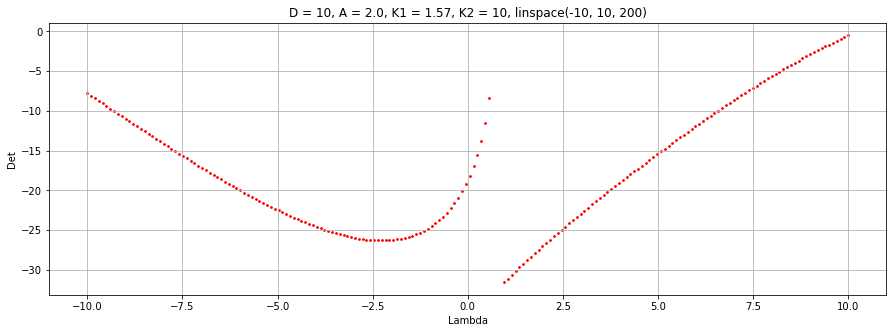

In [122]:
for ij in [1.57]:
    D, A = 10, 2.0
    K1, K2 = ij, 10
    #k11, k12, k13, k21, k22, k23 = 0, K1, K2, 0, K2, K1
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij
    init_approx = [0] * 4
    linsp = [-10, 10, 200]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    
    K = [k11, k12, k13, k21, k22, k23]
    
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()

## Bifurcation points and qualitative changes in solution (see y and z graphs)

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(-3, 21, 1000)


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 10.24
y_approx =  [-1.51042750e-20 -2.79188760e-21 -1.82112071e+00 -2.80255065e-01]  la =  10.237237237237236


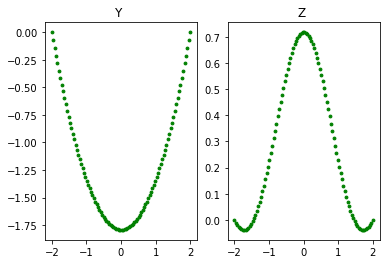

y_approx =  [-1.94258519e-20 -1.68116813e-20 -8.13861654e+00 -5.49608141e+00]  la =  21.0


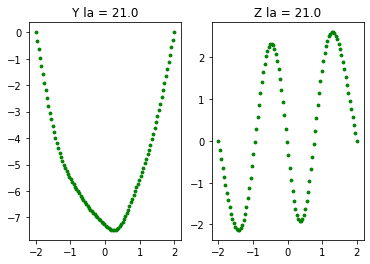

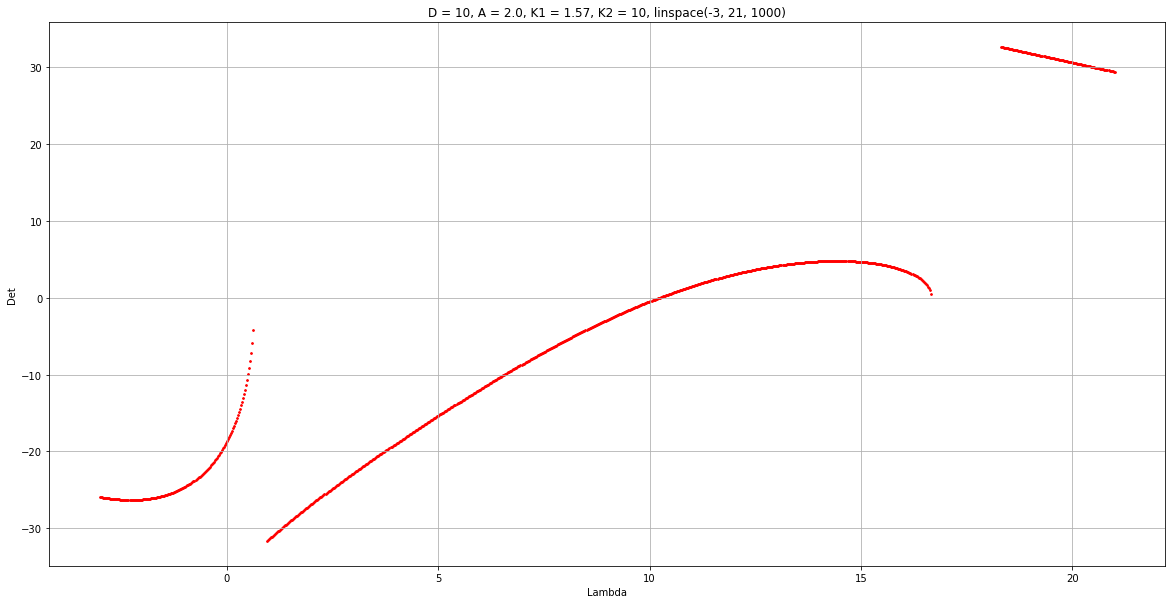

In [343]:
for ij in [1.57]:
    D, A = 10, 2.0
    K1, K2 = ij, 10
    #k11, k12, k13, k21, k22, k23 = 0, K1, K2, 0, K2, K1
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij
    init_approx = [0] * 4
    linsp = [-3, 21, 1000]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    
    K = [k11, k12, k13, k21, k22, k23]
    
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 1000, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()

## Plotting $\lambda - Norm \; of \; solutions$ #

### for lambdas gotten above

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, -50, 800)
init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, -50, 800)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]


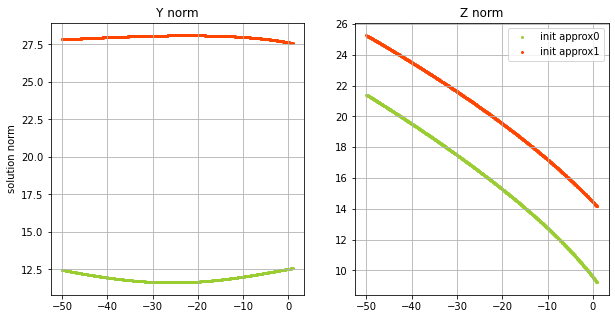

In [299]:
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 400]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])


i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(20, 5)) 
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter(steps, y_norm, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    zax.scatter(steps, z_norm, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i+= 1
yax.grid()
yax.set_ylabel("solution norm")
#ax.set_xlabel("lambda")
zax.grid()
zax.legend()
plt.show()

## Attempting to build branches from bifurcation points

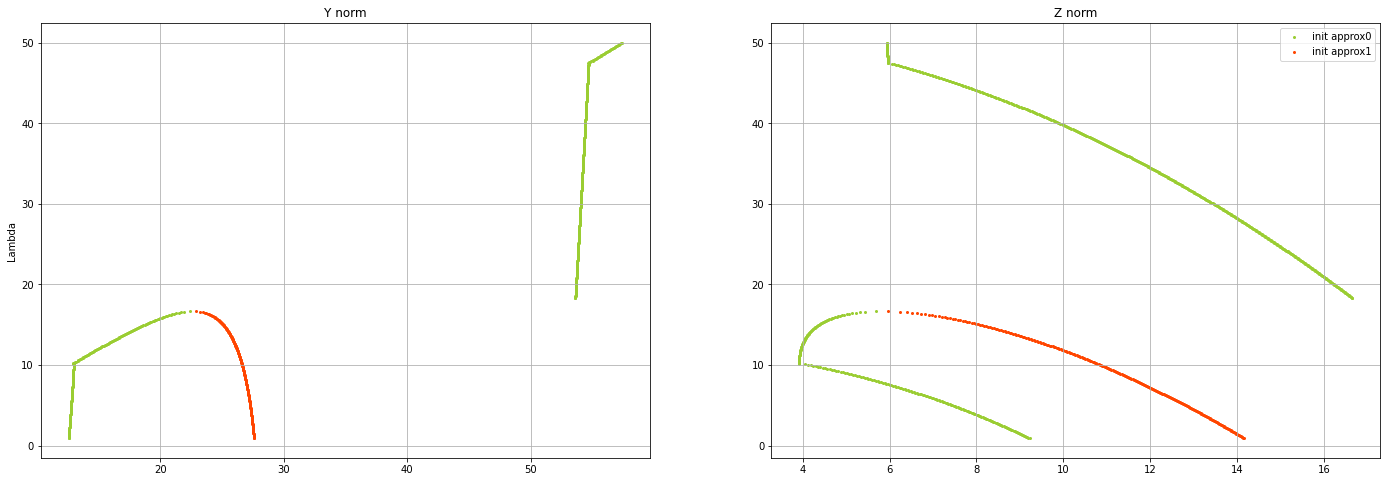

In [310]:
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 100, 800]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    # print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(24, 8))
#ax = fig.add_subplot(111)   
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i+= 1
    #zax.grid()
yax.grid()
yax.set_ylabel("Lambda")
#ax.set_xlabel("lambda")
zax.grid()
zax.legend()
plt.show()

### $\lambda = 47.5 $ # 

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 40, 200)
init_approx = [-0.01, -0.01, -7.8530482699999995, -1.21425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, 40, 200)
init_approx = [-5.24808263e-19, 1.50595357e-19, -7.84304827, -1.20425494]


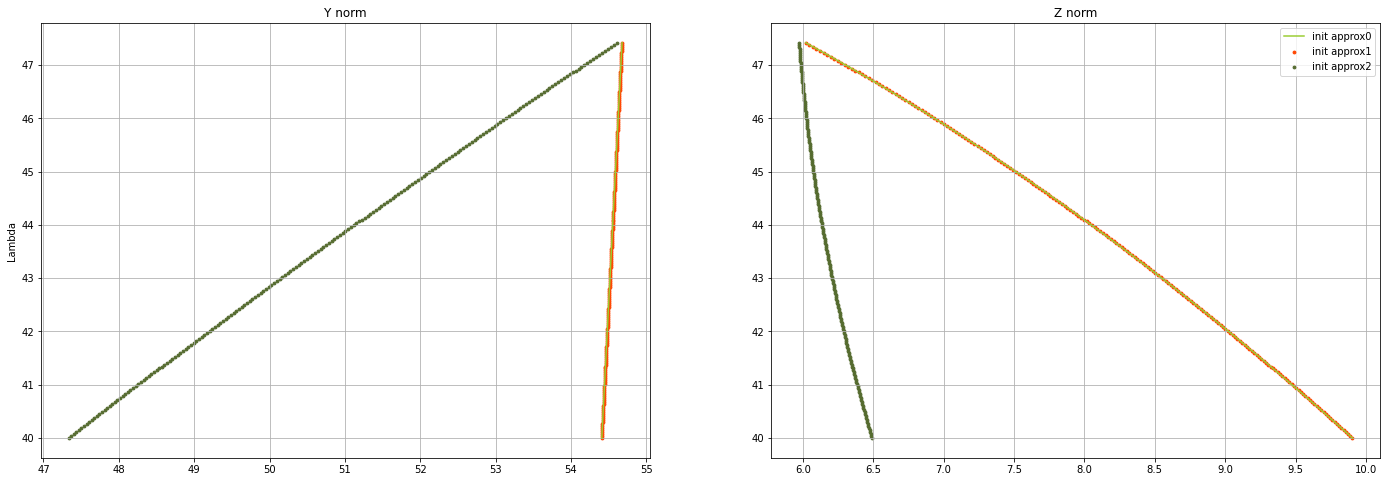

In [366]:
y0 = [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
La = 47.42054818523154

stepsNorms = []
for init_approx in [[i - 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 40, 200]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(24, 8))
#ax = fig.add_subplot(111)   
for [steps, y_norm, z_norm] in stepsNorms[:1]:
    yax.plot( y_norm, steps, color = colors[i], label = 'init approx' + str(i))
    zax.plot(z_norm, steps, color = colors[i], label = 'init approx' + str(i))
    i+= 1

for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 8, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 8, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i+= 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
zax.legend()
plt.show()

## Merging branches

#### Plots of y and z show changes in function structure on different branches

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 200, 3000)
Det Change, lambda = 10.16
y_approx =  [ 8.59581045e-20  7.27730728e-23 -1.82222719e+00 -4.98344322e-01]  la =  10.155698566188729


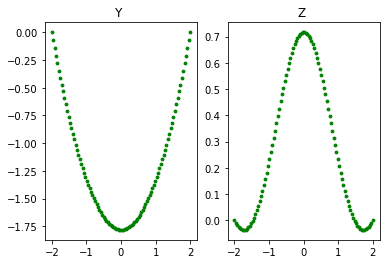

Det Change, lambda = 10.29
y_approx =  [-1.56888575e-21  2.64673854e-21 -1.82257178e+00 -2.81054986e-01]  la =  10.288456818939647


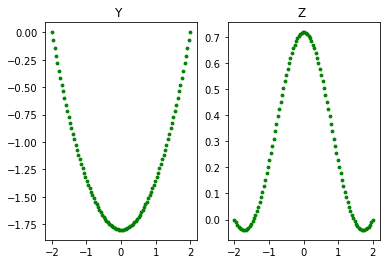

<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 200, 3000)
Det Change, lambda = 47.53
y_approx =  [ 1.92210276e-19 -1.08440041e-19 -7.82122778e+00 -8.42880434e-01]  la =  47.52714671557185


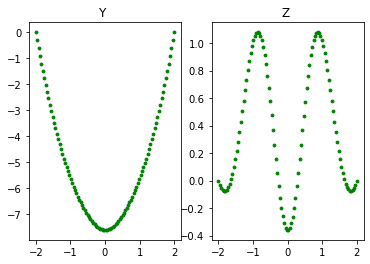

Det Change, lambda = 112.18
y_approx =  [-1.02975352e-20  3.43471932e-22 -1.79798226e+01 -2.04561652e+00]  la =  112.18041580526841


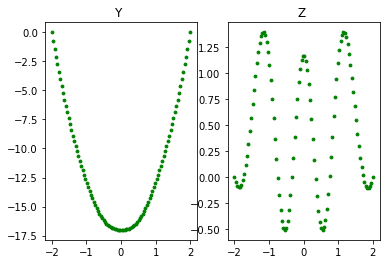

Det Change, lambda = 112.31
y_approx =  [ 7.86264132e-20 -4.88566449e-20 -1.79305527e+01 -1.50641891e+00]  la =  112.31317405801933


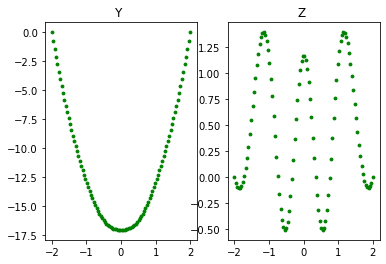

<ipython-input-268-b358be8b3859>:102: RuntimeWarning: invalid value encountered in subtract
  D[:, i] = (dr - redisuals) / eps


init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, -100, 2500)
init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, -100, 2500)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]

 block 2
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -100, 2600)
y_approx =  [ 5.26952438e-21 -7.21209264e-23  1.16274081e+00  1.92044908e+00]  la =  -19.48113773421086


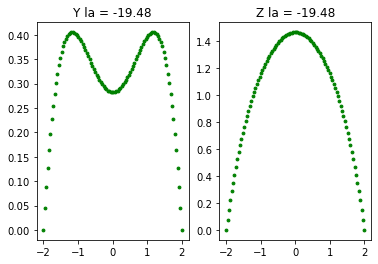

Det Change, lambda = -39.4
y_approx =  [-4.61113784e-20  5.39147454e-22  2.24905501e+00  3.07314119e+00]  la =  -39.39896155785344


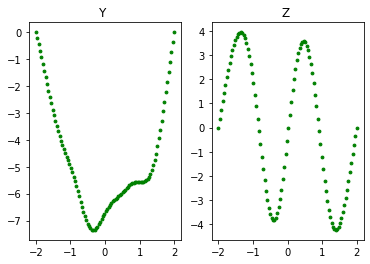

y_approx =  [ 7.60707236e-19  2.56779043e-21 -5.18136347e+00  9.75533913e+00]  la =  -49.14598172687002


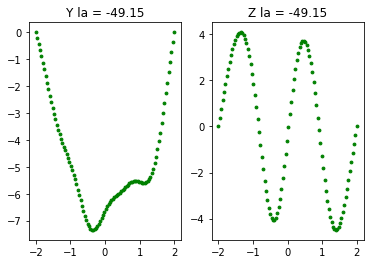

y_approx =  [ 2.49200542e-18 -3.72862164e-19 -4.26942153e+00  1.13128145e+01]  la =  -78.81082571952919


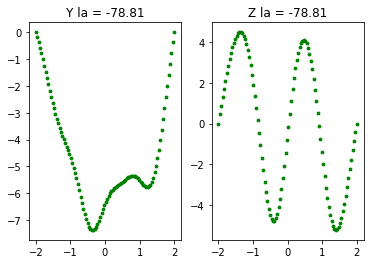

init_approx = [-4.14343882e-22, -4.38348126e-22, -1.82214349, -0.505485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -100, 2600)
y_approx =  [-1.66022699e-21 -2.82870961e-34 -1.88174640e+00 -2.64680053e+00]  la =  -19.48113773421086


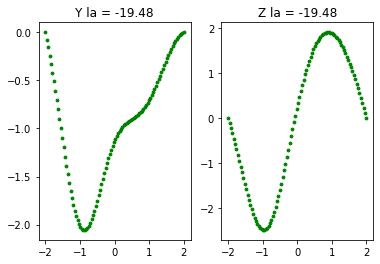

y_approx =  [ 2.25668074e-21 -1.68010366e-22 -2.50008453e+00 -4.09839305e+00]  la =  -49.14598172687002


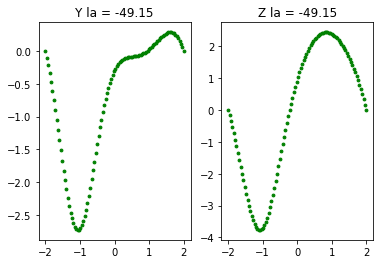

y_approx =  [ 1.36676909e-21  1.67763388e-22 -3.31866769e+00 -5.65796443e+00]  la =  -78.81082571952919


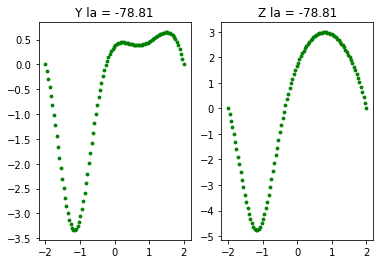

init_approx = [-0.01, -0.01, -1.83214349, -0.515485279]

 block 3
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -100, 2600)
y_approx =  [ 1.77419107e-21 -4.47774143e-23 -8.27072423e+00 -6.42957934e+00]  la =  7.771851308941869


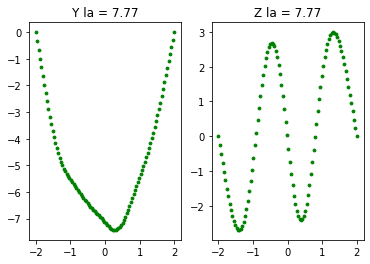

y_approx =  [-1.40948019e-21 -6.51661046e-23 -8.68173489e+00 -8.49509021e+00]  la =  -31.93356759435251


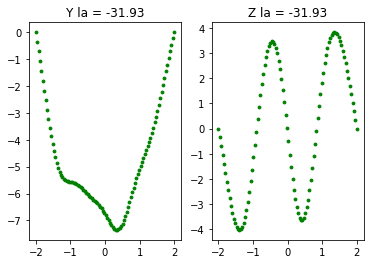

y_approx =  [ 3.82548092e-21 -5.29408885e-22 -9.09613864e+00 -1.00848673e+01]  la =  -71.63898649764688


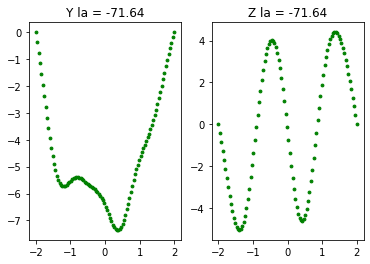

init_approx = [-0.01, -0.01, -7.8530482699999995, -1.21425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -100, 2600)
y_approx =  [-1.62577321e-18 -7.30089748e-20 -4.01852641e+00  3.23048708e+00]  la =  7.771851308941869


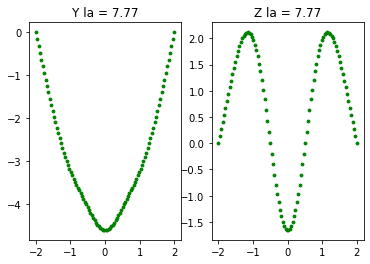

y_approx =  [-1.49115238e-21 -3.30061354e-23 -2.37299041e+00  6.05039499e+00]  la =  -31.93356759435251


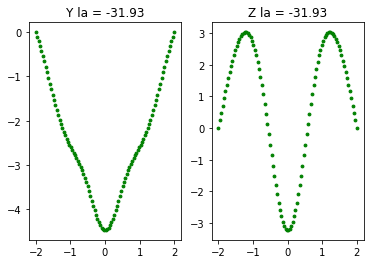

y_approx =  [ 7.98286999e-21 -6.54753206e-21 -8.04574794e-01  8.09223684e+00]  la =  -71.63898649764688


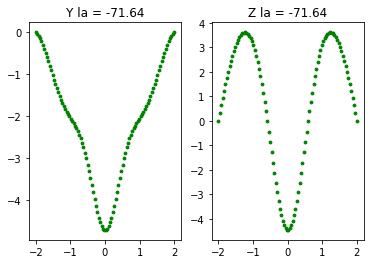

init_approx = [-5.24808263e-19, 1.50595357e-19, -7.84304827, -1.20425494]


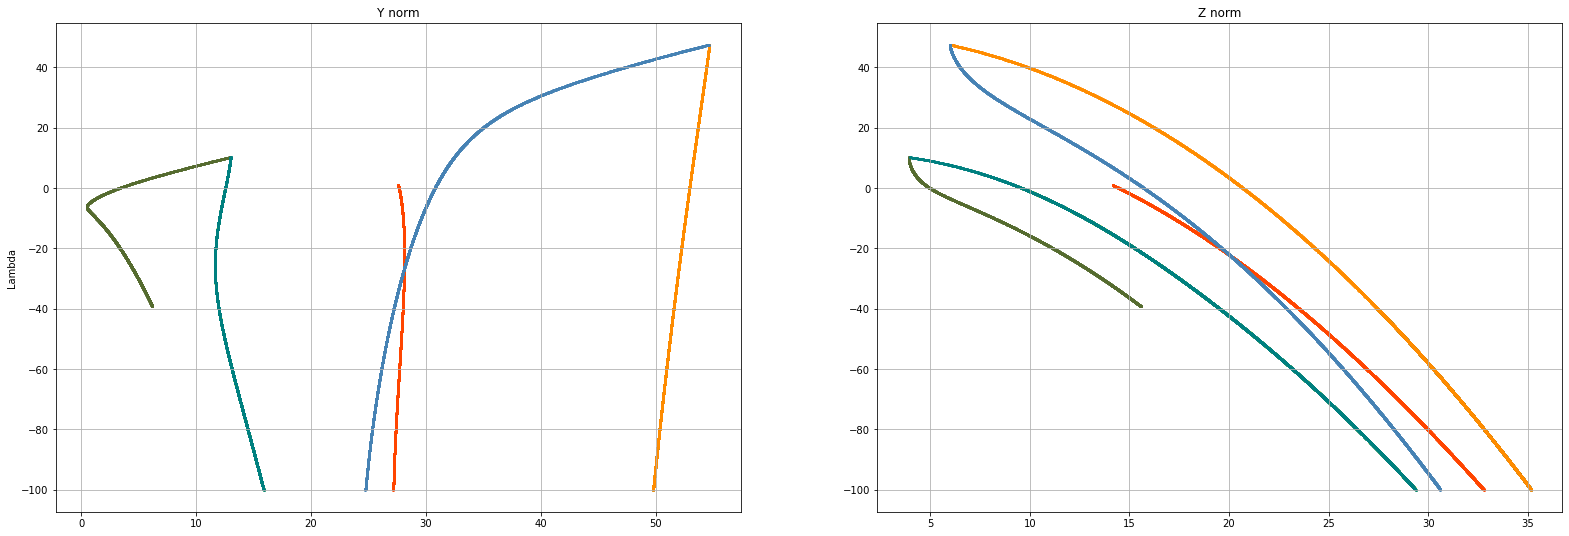

In [368]:
# 1
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 200, 3000]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

    
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, - 100, 2500]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])


# 2 ------------------------------------------------------------------------------------------
# развилка рядом с La = 10.26
print('\n', 'block 2')
y0 = [-4.14343882e-22, -4.38348126e-22, -1.82214349e+00, -5.05485279e-01]
La = 10.141327909887359

for init_approx in [y0, [i - 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -100, 2600]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])




# 3 ------------------------------------------------------------------------------------------
print('\n', 'block 3')
y0 = [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
La = 47.42054818523154

for init_approx in [[i - 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -100, 2600]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    
# graph ------------------------------------------------------------------------------------------
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
Det Change, lambda = 10.14
y_approx =  [-4.14343882e-22 -4.38348126e-22 -1.82214349e+00 -5.05485279e-01]  la =  10.141327909887359


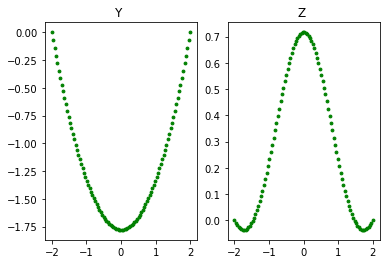

Det Change, lambda = 10.26
y_approx =  [ 1.19151634e-21 -3.72423790e-21 -1.81940725e+00 -2.79255313e-01]  la =  10.264158948685857


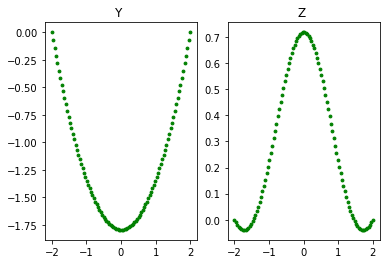

<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 47.42
y_approx =  [-5.24808263e-19  1.50595357e-19 -7.84304827e+00 -1.20425494e+00]  la =  47.42054818523154


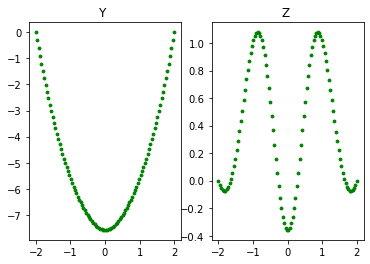

Det Change, lambda = 47.54
y_approx =  [ 3.85949308e-22 -2.68166811e-22 -7.82434204e+00 -8.39232375e-01]  la =  47.54337922403004


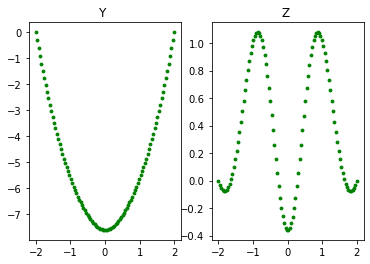

init_approx = [0.01, 0.01, -1.80653113, -0.267616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.929, 50, 800)
init_approx = [3.61828163e-19, -2.15234554e-19, -1.81653113, -0.277616815]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -50, 2000)
y_approx =  [-2.99133383e-20 -1.71816781e-21  6.23006018e-01  1.33280752e+00]  la =  -10.888581149147793


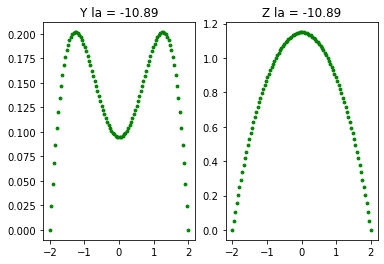

y_approx =  [3.78163202e-21 1.30761814e-22 1.85994253e+00 2.66995202e+00]  la =  -31.948575914991288


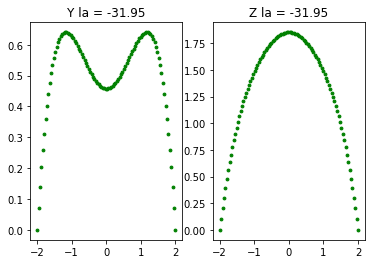

Det Change, lambda = -42.03
y_approx =  [-5.15247142e-21  3.13921347e-24  2.37966739e+00  3.20567666e+00]  la =  -42.02728769578782


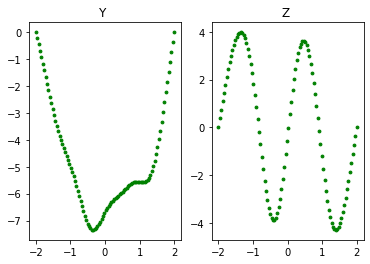

init_approx = [-4.14343882e-22, -4.38348126e-22, -1.82214349, -0.505485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(10.141327909887359, -50, 2000)
y_approx =  [-6.34239393e-22  2.90765450e-23 -1.81300245e+00 -2.29338692e+00]  la =  -10.888581149147793


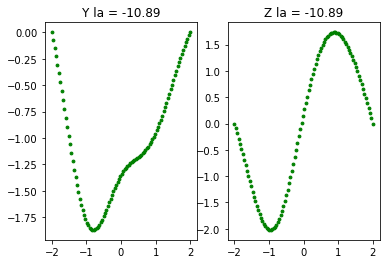

y_approx =  [ 6.80546003e-22 -1.92617216e-22 -2.08448405e+00 -3.21634146e+00]  la =  -31.948575914991288


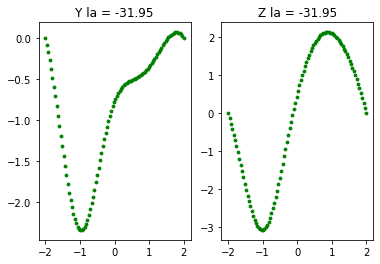

init_approx = [-0.01, -0.01, -1.83214349, -0.515485279]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -50, 2400)
y_approx =  [ 8.46360358e-20  1.05795045e-20 -8.15747468e+00 -5.64518487e+00]  la =  19.03498620879267


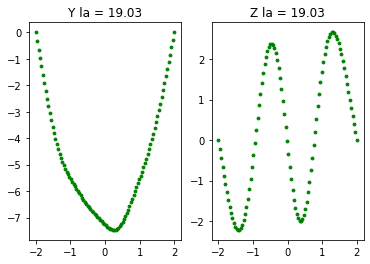

y_approx =  [ 5.76193291e-20 -2.21672667e-20 -8.44737758e+00 -7.41697014e+00]  la =  -9.391184583063136


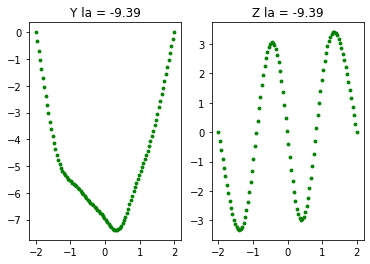

y_approx =  [-2.69954465e-21  1.55942387e-22 -8.74325852e+00 -8.75114099e+00]  la =  -37.81735537491895


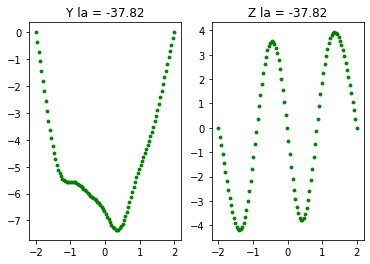

init_approx = [-0.01, -0.01, -7.8530482699999995, -1.21425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -50, 2400)
y_approx =  [ 2.00088568e-19  8.38928157e-20 -4.61932339e+00  2.13882033e+00]  la =  19.03498620879267


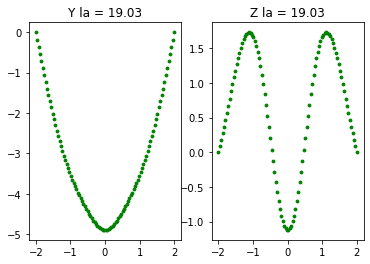

y_approx =  [-1.74938704e-18  1.06171073e-19 -3.27700257e+00  4.60378228e+00]  la =  -9.391184583063136


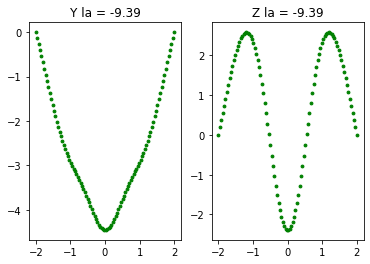

y_approx =  [ 6.27808832e-18 -3.51689620e-19 -2.13865854e+00  6.38558772e+00]  la =  -37.81735537491895


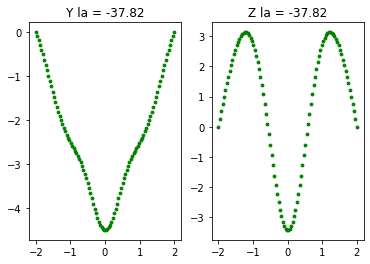

init_approx = [-0.0010000000000000005, -0.0009999999999999998, -7.84404827, -1.2052549399999999]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -50, 2400)
y_approx =  [-6.41817033e-19  2.12885749e-19 -4.61932339e+00  2.13882033e+00]  la =  19.03498620879267


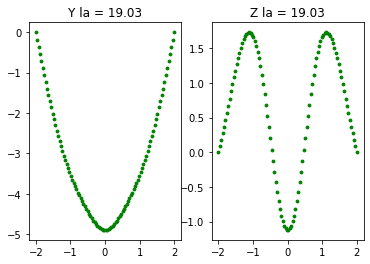

y_approx =  [-1.74938704e-18  1.06171073e-19 -3.27700257e+00  4.60378228e+00]  la =  -9.391184583063136


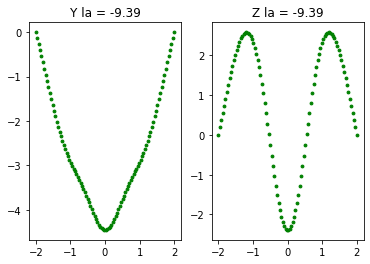

y_approx =  [ 6.27808832e-18 -3.51689620e-19 -2.13865854e+00  6.38558772e+00]  la =  -37.81735537491895


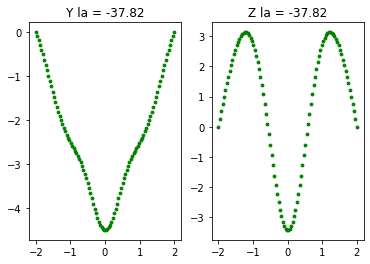

init_approx = [-5.24808263e-19, 1.50595357e-19, -7.84304827, -1.20425494]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(47.42054818523154, -50, 2400)
y_approx =  [-6.41817033e-19  2.12885749e-19 -4.61932339e+00  2.13882033e+00]  la =  19.03498620879267


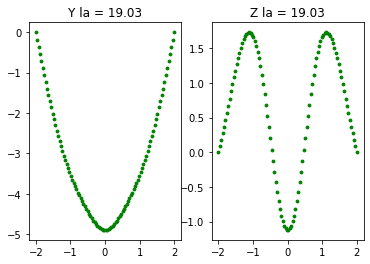

y_approx =  [-1.74938704e-18  1.06171073e-19 -3.27700257e+00  4.60378228e+00]  la =  -9.391184583063136


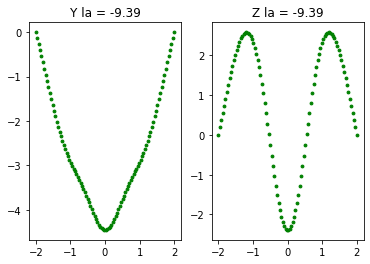

y_approx =  [ 6.27808832e-18 -3.51689620e-19 -2.13865854e+00  6.38558772e+00]  la =  -37.81735537491895


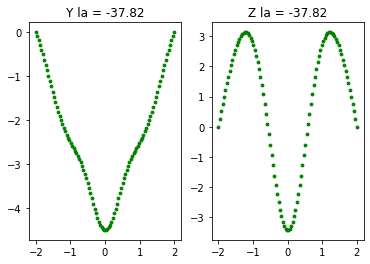

init_approx = [0.01, 0.01, -7.83304827, -1.19425494]


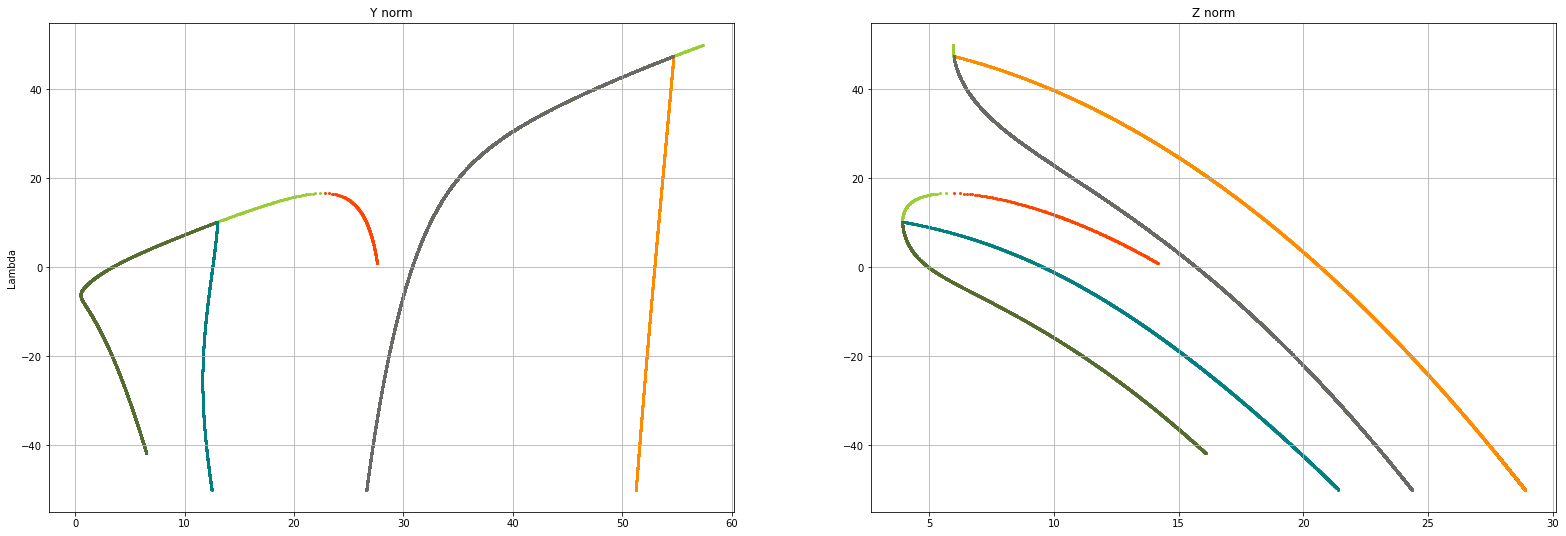

In [362]:
# 1
La = 0.929
y0 =  [ 3.61828163e-19, -2.15234554e-19, -1.81653113e+00, -2.77616815e-01]
eps = 1e-3

stepsNorms = []
for init_approx in [[i + 10 * eps for i in y0], y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 50, 800]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    # print('init_approx =', str(init_approx))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])


# 2 ------------------------------------------------------------------------------------------
# развилка рядом с La = 10.26

y0 = [-4.14343882e-22, -4.38348126e-22, -1.82214349e+00, -5.05485279e-01]
La = 10.141327909887359

for init_approx in [y0, [i - 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 2000]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])



# 3 ------------------------------------------------------------------------------------------

y0 = [-5.24808263e-19, 1.50595357e-19, -7.84304827e+00, -1.20425494e+00]
La = 47.42054818523154

for init_approx in [[i - 10 * eps for i in y0], [i - eps for i in y0], y0, [i + 10 * eps for i in y0]]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -50, 2000]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    
# graph ------------------------------------------------------------------------------------------
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 4, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

mistake at value = -0.7478260869565218 lambda =  -6.386108818921567
mistake at value = -0.75 lambda =  -35.88602349457367
last y_approx [-6.386108818921567, -1.0494582891589472, -0.514225807486624, -0.5644184020505748] lambda -6.360657725074284
last y_approx [-5.699433929869903, 0.15382728463949974, 0.5435079775977493, -0.03689932554326941] lambda -5.729929568426056


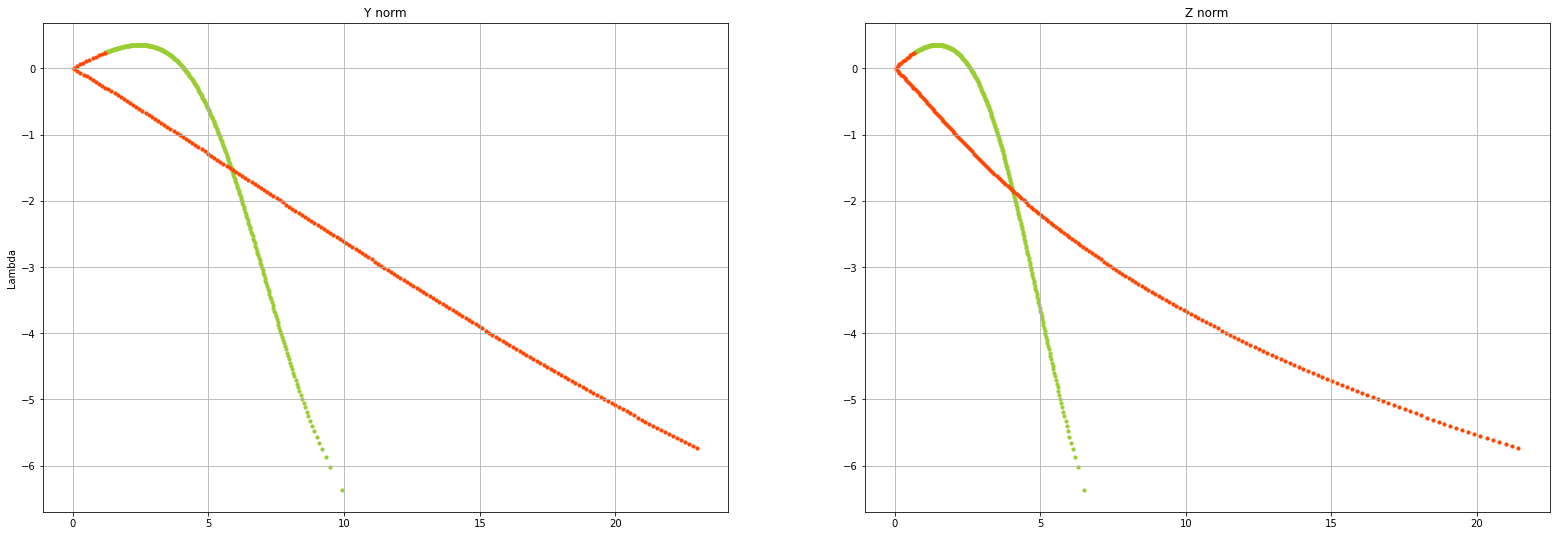

In [775]:
K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []
la = 0.5
y0 = [0, 0, 0.0, 0]

# y0 = [-0.724295, -4.9591, -0.3718, -0.3866273] 
# la = -5.1950278265821455
# linsp [-1, 0]
# dets, lambdas_for_plot = fp_iterate(0, [0.01, 1, 50], D, K, A, y0, system, bc, 50, filename)


stepsNorms = []
for func_num in [0]:
    steps, y_norm, z_norm = fp_norm_param(func_num, [-0.1, -0.75, 300], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    la = 0.1
    y0 = [0, 0.01, 0.005, 0]
    steps, y_norm, z_norm = fp_norm_param(func_num, [-0.1, 1.8, 200], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
i = 0
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

In [ ]:
K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []
la =  -5.72992
y0 = [-5.699433929869903, 0.15382728463949974, 0.5435079775977493, -0.03689932554326941]

newstepsNorms = []
for func_num in [0]:
    #steps, y_norm, z_norm = fp_norm_param(func_num, [-5.699433, -6, 60], D, K, A, y0, system, bc, [])
    #stepsNorms.append([steps, y_norm, z_norm])
    la = 0.1
    y0 = [0, 0.01, 0.005, 0]
    steps, y_norm, z_norm = fp_norm_param(func_num, [-5.699433, -5, 60], D, K, A, y0, system, bc, [])
    newstepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in newstepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

last y_approx [8.835691683783638, -0.40342336716963506, -1.1846283277972474, -1.6703892205814055] lambda 8.712480064281602
mistake at value = -5.7169766530612245 lambda =  9.41788655409864


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


mistake at value = -5.718008632653061 lambda =  89.58462917647924
mistake at value = -5.719040612244898 lambda =  -70.51206418144531
mistake at value = -5.720072591836734 lambda =  97.02174062493171
mistake at value = -5.7211045714285715 lambda =  56.225376444643786
mistake at value = -5.722136551020408 lambda =  369.4576909653526
mistake at value = -5.723168530612245 lambda =  369.4576909653526
mistake at value = -5.724200510204081 lambda =  369.4576909653526
mistake at value = -5.725232489795919 lambda =  369.4576909653526
mistake at value = -5.726264469387755 lambda =  369.4576909653526
mistake at value = -5.727296448979592 lambda =  369.4576909653526
mistake at value = -5.728328428571428 lambda =  369.4576909653526
mistake at value = -5.729360408163266 lambda =  369.4576909653526
mistake at value = -5.730392387755102 lambda =  369.4576909653526
mistake at value = -5.731424367346939 lambda =  369.4576909653526
mistake at value = -5.7324563469387755 lambda =  369.4576909653526
mistak

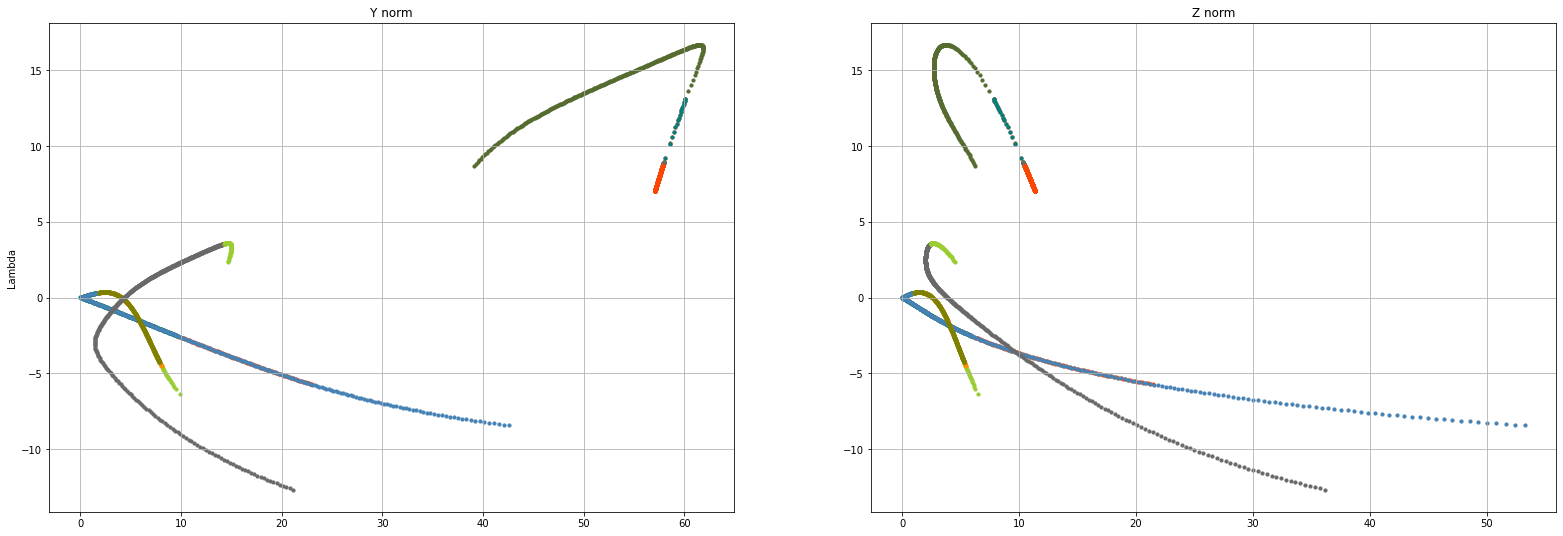

In [794]:
K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []
la =  -5.72992
y0 = [-5.699433929869903, 0.15382728463949974, 0.5435079775977493, -0.03689932554326941]

newstepsNorms = []
for func_num in [0]:
    la =  -5.72992
    y0 = [-5.699433929869903, 0.15382728463949974, 0.5435079775977493, -0.03689932554326941]
    steps, y_norm, z_norm = fp_norm_param(func_num, [-5.699433, -3.8, 300], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    la =  -5.72992
    y0 = [-5.699433929869903, 0.15382728463949974, 0.5435079775977493, -0.03689932554326941]
    steps, y_norm, z_norm = fp_norm_param(func_num, [-5.699433, -5.75, 50], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i = (i + 1) % 8
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(8.94306, -12, 400)


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


init_approx = [8.835691683783638, -0.40342336716963506, -1.1846283277972474, -1.6703892205814055]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(8.94306, -12, 400)
init_approx = [-5.85, 1.097632638679737, -1.7547298875289081, -3.6012463368423635]


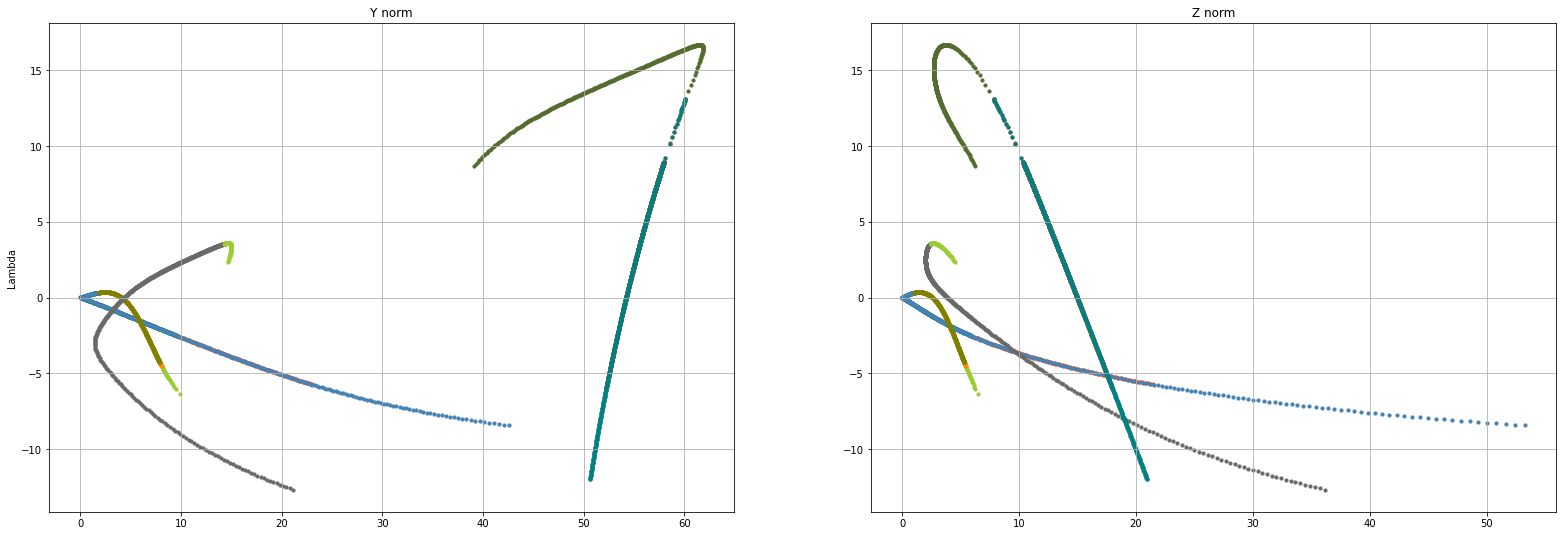

In [803]:
y0 = [8.835691683783638, -0.40342336716963506, -1.1846283277972474, -1.6703892205814055]
la = 8.712480

y1 = [-5.85, 1.097632638679737, -1.7547298875289081, -3.6012463368423635]
la = 8.94306
La = la


K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []


newstepsNorms = []
for init_approx in [y0 , y1]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, - 12, 400]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

la = 8.712480
La = la
'''
for init_approx in [ y0,  y1]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 7, 120]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 700, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
'''
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i = (i + 1) % 8
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
plt.show()

In [659]:
K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []
la =  -1.396
y0 = [0.45,  0.091964,  0.10514626, -0.00804639]

result = fp_shooting(0, np.linspace(-A, A, 100), y0, system, params, bc, bc_params, filename)  # skip_i = 0

result

(0,
 array([ 0.45      ,  0.10440595,  0.13535773, -0.01096562]),
 array([1.10514547e-06, 6.29711344e-08, 3.73308506e-07, 1.22223813e-06]),
 -14.903672585139988,
 -1.3963955577353573)

## Starting $\lambda$ from zero

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.0001, 4, 100)


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 0.73
y_approx =  [-0.15528311 -0.0988841  -0.04574027 -0.00351684]  la =  0.7273545454545454


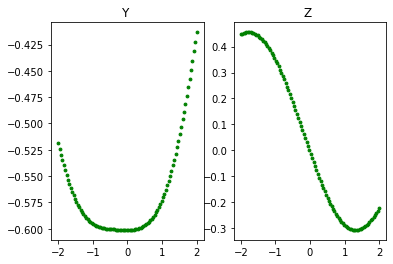

Det Change, lambda = 3.68
y_approx =  [-1.24569585  0.21202993 -0.34578532  0.42250115]  la =  3.676775757575758


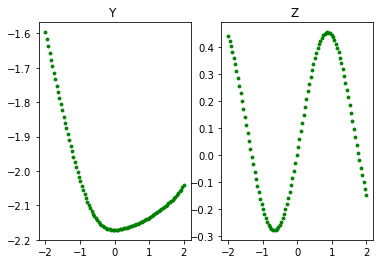

init_approx = [0, 0.01, 0, 0.001]
D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0.0001, -4, 100)
init_approx = [0, 0.01, 0, 0.001]


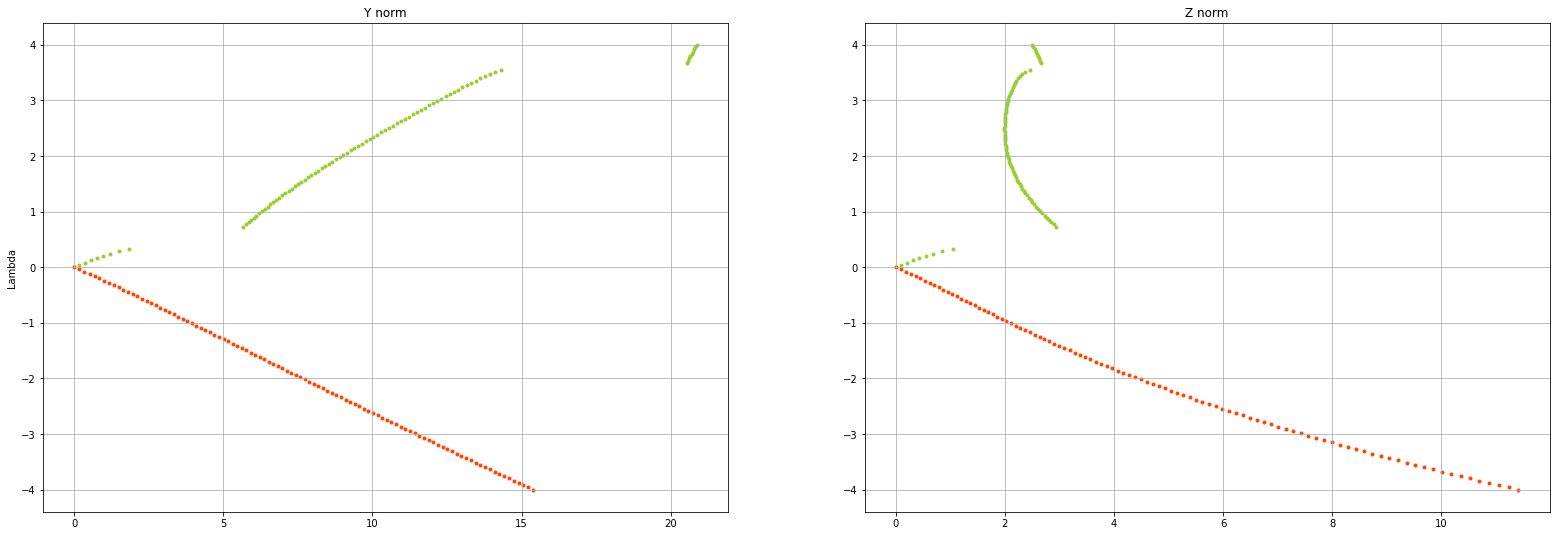

In [753]:
# 1
La = 0.0001
la = 0.0001
y0 =  [ 0, 0.01, 0, 0.001]
eps = 1e-3

stepsNorms = []
for init_approx in [y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, 4, 100]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lmz, lmn, lmc = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
for init_approx in [y0]: # , [i - 10 * eps for i in y0]]:
    K1, K2 = 1.57, 10
    D, A = 10, 2.0
    linsp = [La, -4, 100]
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = K1, K2 = K2, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [0, K1, K2, 0, K2, K1]
    filename = 'ProjFiles/trace_linspace{a}_{b}_{c}.txt'.format(a = linsp[0], b = linsp[1], c = linsp[2])
    dets, lambdas_for_plot, lmz, lmn, lmc = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 50000, filename)
    print('init_approx =', str(init_approx))
    steps, y_norm, z_norm = norm_param(linsp, D, K, A, init_approx, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])



# graph ------------------------------------------------------------------------------------------
i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 9, color = colors[i], label = 'init approx' + str(i))
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 9, color = colors[i], label = 'init approx' + str(i))
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

last y_approx [-5.974649298266793, -1.045876323892984, -0.48765258778022724, -0.5317357075673058] lambda -6.182240649583651
last y_approx [-3.7893988863158152, 0.14424746994576276, 0.362181687033987, -0.02839640290353297] lambda -3.8103462825166634


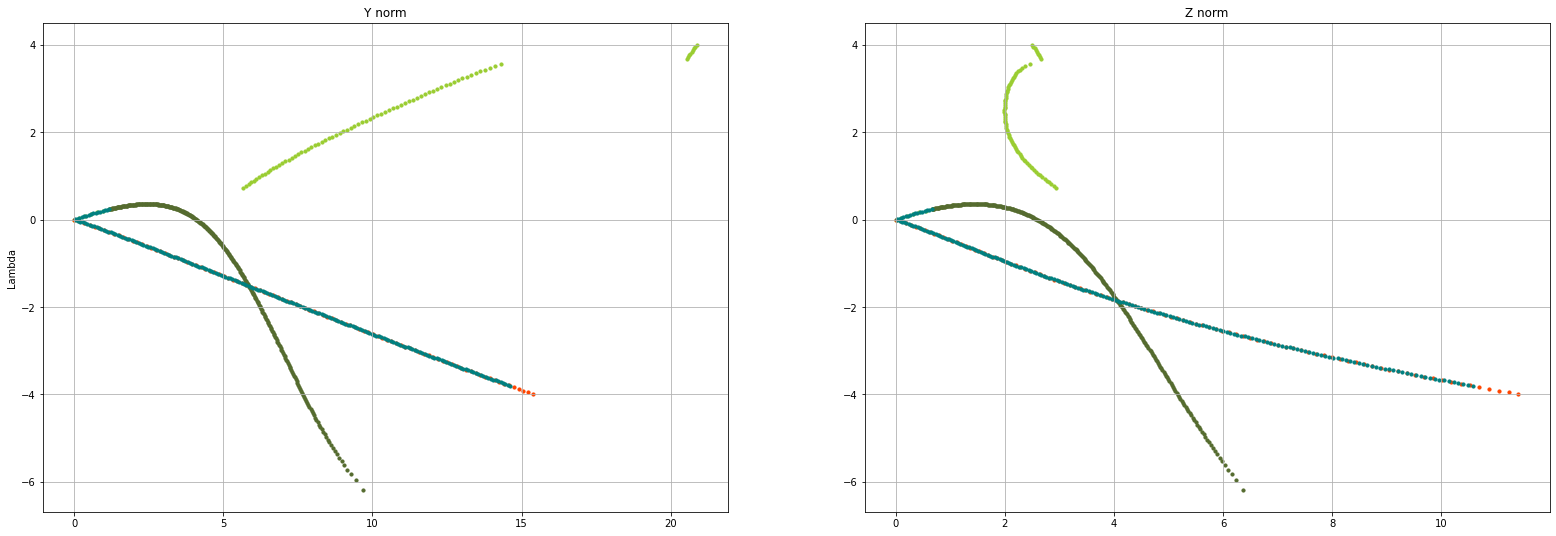

In [754]:
K1, K2, D, A = 1.57, 10, 10, 2.0
K = [0, K1, K2, 0, K2, K1]
params, bc_params = [], []
la = 0.5
y0 = [0, 0, 0.0, 0]

# y0 = [-0.724295, -4.9591, -0.3718, -0.3866273] 
# la = -5.1950278265821455
# linsp [-1, 0]
# dets, lambdas_for_plot = fp_iterate(0, [0.01, 1, 50], D, K, A, y0, system, bc, 50, filename)

for func_num in [0]:
    steps, y_norm, z_norm = fp_norm_param(func_num, [-0.1, -0.745, 300], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    la = 0.1
    y0 = [0, 0.01, 0.005, 0]
    steps, y_norm, z_norm = fp_norm_param(func_num, [-0.1, 1.2, 200], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    #yax.grid()
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i += 1
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
# zax.legend()
plt.show()

last y_approx [-12.596857798479284, 1.4348869465332368, 0.6575250955686717, -0.5271613879812959] lambda -12.675378633949943
last y_approx [2.417863885066785, -0.015059581686216286, -0.23228082813760273, 1.1012163344078163] lambda 2.3251314750288845


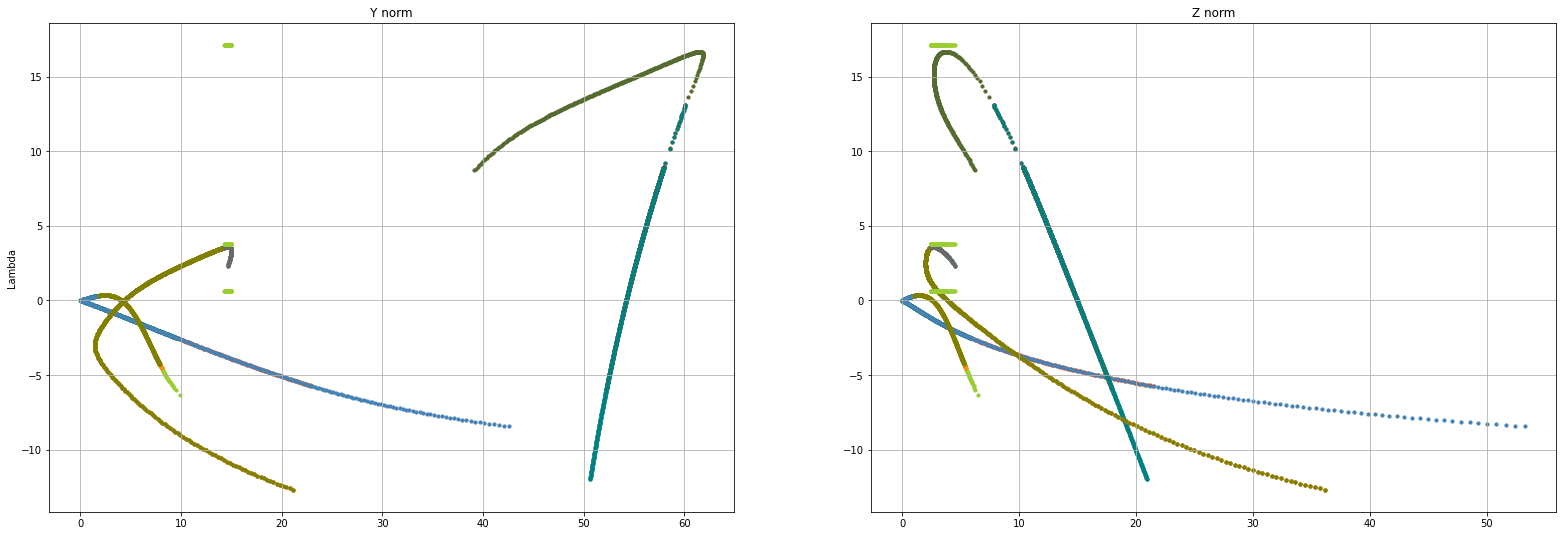

In [808]:
y0 =  [-1.2456,  0.21202, -0.3457,  0.42250115]  
la =  3.6767

newstepsNorms = []
for func_num in [0]:
    steps, y_norm, z_norm = fp_norm_param(func_num, [-1.2456, 0, 500], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    y0 =  [-1.2456,  0.21202, -0.3457,  0.42250115]  
    la =  3.676775757575758
    steps, y_norm, z_norm = fp_norm_param(func_num, [-1.245, -1.4, 80], D, K, A, y0, system, bc, [])
    stepsNorms.append([steps, y_norm, z_norm])
    newstepsNorms.append([steps, y_norm, z_norm])

i = 0
fig, (yax, zax) = plt.subplots(1, 2, figsize=(27, 9))
for [steps, y_norm, z_norm] in stepsNorms:
    yax.scatter( y_norm, steps, s = 10, color = colors[i])
    yax.set_title('Y norm')
    zax.scatter(z_norm, steps, s = 10, color = colors[i])
    zax.set_title('Z norm')
    i += 1
    i %= 8

yax.scatter( y_norm, [0.6613226 for j in y_norm], s = 10, color = colors[i])
zax.scatter(z_norm, [0.6613226 for j in y_norm], s = 10, color = colors[i])
yax.scatter( y_norm, [3.78757 for j in y_norm], s = 10, color = colors[i])
zax.scatter(z_norm, [3.78757 for j in y_norm], s = 10, color = colors[i])
yax.scatter( y_norm, [17.13426 for j in y_norm], s = 10, color = colors[i])
zax.scatter(z_norm, [17.13426 for j in y_norm], s = 10, color = colors[i])
    
yax.grid()
yax.set_ylabel("Lambda")
zax.grid()
plt.show()

In [804]:
stepsNorms_save = stepsNorms

### Dependency of Frechet matrix determinant on lambda value

Here we can see different branches, intersecting x axis.

D = 10, A = 2.0, K1 = 1.57, K2 = 10, linspace(0, 200, 1000)


<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: overflow encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (y + k11 * y**2 + 2 * k12 * z * y + k13 * z**2 + la) / D    # d^2y / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: overflow encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2
<ipython-input-269-c34cbacdaf35>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (z + k21 * y**2 + 2 * k22 * z * y + k23 * z**2 + la) / D     # d^2z / dx^2


Det Change, lambda = 2.2
y_approx =  [-0.08205462 -0.04470591 -0.024288   -0.00059021]  la =  2.2022022022022023


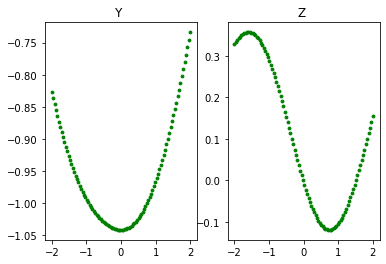

Det Change, lambda = 4.6
y_approx =  [-1.17790644  0.24326108 -0.33620273  0.3282277 ]  la =  4.604604604604605


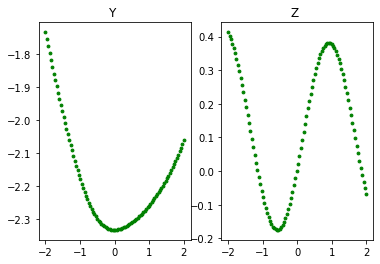

Det Change, lambda = 61.46
y_approx =  [-16.28477665   0.13508363  -4.48788606   3.19971977]  la =  61.46146146146147


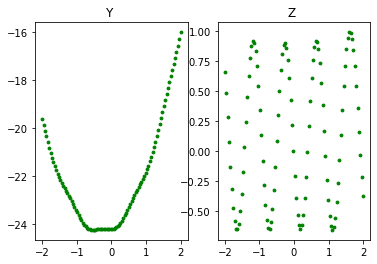

Det Change, lambda = 72.87
y_approx =  [-22.6767489    0.87629157  -6.43418942   0.45979048]  la =  72.87287287287288


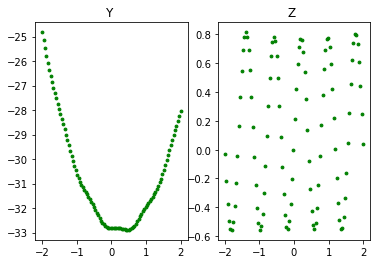

y_approx =  [-37.45263469  -1.27525215 -12.20652071 -15.16774897]  la =  99.8998998998999


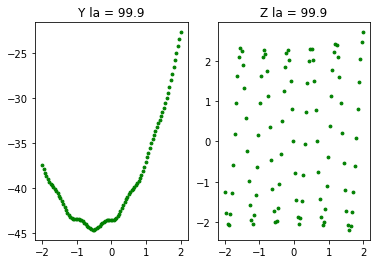

Det Change, lambda = 150.35
y_approx =  [-42.13501772  -0.50526345 -12.3928878    2.30903545]  la =  150.35035035035037


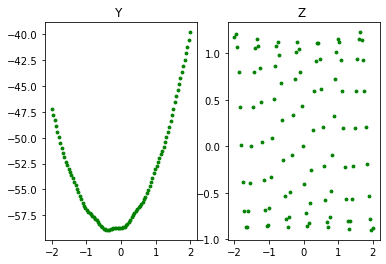

Det Change, lambda = 168.37
y_approx =  [-52.33446296   0.35830147 -13.55870366   9.50348793]  la =  168.36836836836838


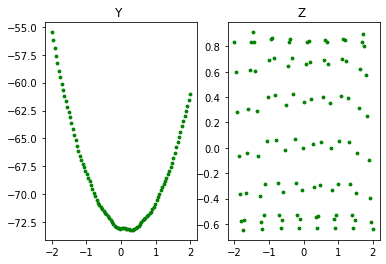

y_approx =  [-73.80948661  -1.68369782 -21.66597407   5.69614134]  la =  200.0


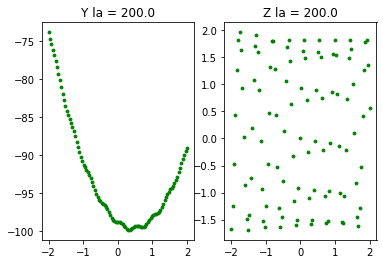

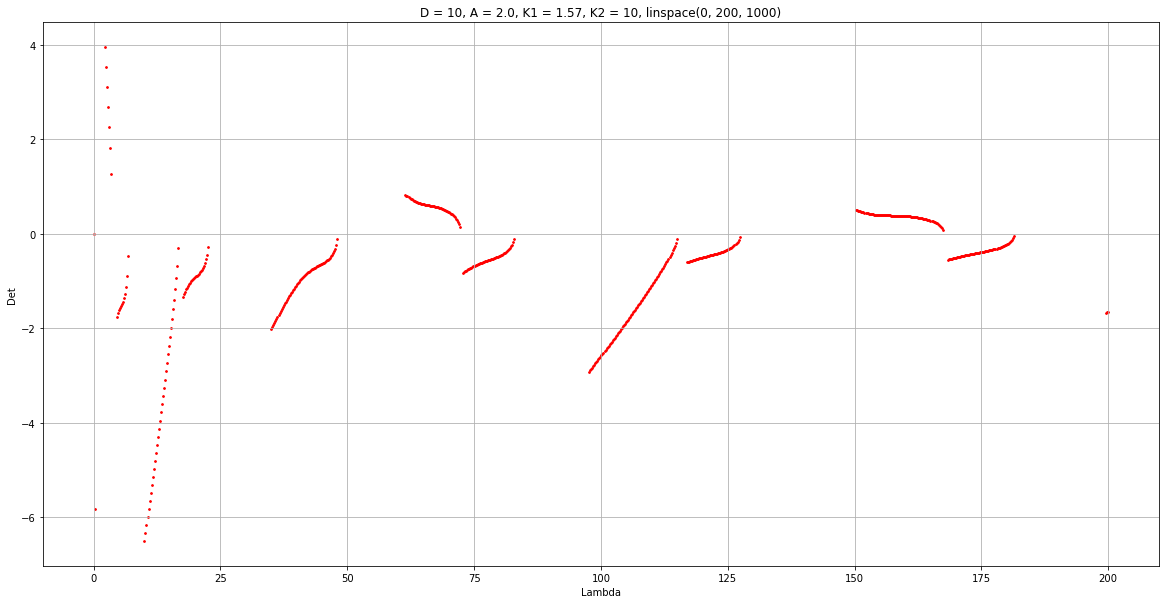

In [809]:
for ij in [1.57]:
    D, A, K1, K2 = 10, 2.0, ij, 10
    k11, k12, k13, k21, k22, k23 = 0, ij, 10, 0, 10, ij   #  0, K1, K2, 0, K2, K1
    init_approx =  [0, 0, 0, 0]
    linsp = [0, 200, 1000]
    lambdas = np.linspace(linsp[0], linsp[1], linsp[2])
    print('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    K = [k11, k12, k13, k21, k22, k23]
    
    dets, lambdas_for_plot, lambdas_mistake_zerodet, lambdas_mistake_nan, lambdas_mistake_cycle = lambda_iterate(linsp, D, K, A, init_approx, system, bc, 500, filename)
    # scatterNoBlowouts(lambdas_for_plot, dets, 'D = ' + str(D) + '; ' + str(K), plot = True)
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()    
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Det")
    plt.scatter(lambdas_for_plot, dets, s = 3, color = 'red')
    plt.title('D = {D}, A = {A}, K1 = {K1}, K2 = {K2}, linspace({l1}, {l2}, {l3})'.format(D = D, A = A, K1 = ij, K2 = 10, l1 = linsp[0], l2 = linsp[1], l3 = linsp[2]))
    plt.grid()
    plt.show()